In [ ]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np
import torch

#Load dataset
X = np.zeros((100,1))
y = np.zeros((100,1))

for i in range(1,101):
  X[i-1] = np.arange(i,(i+1))
  y[i-1] = np.power(i, 1/7)

X= X*1.0
y= y*1.0

#define keras model
model = Sequential()

model.add(Dense(6,input_dim=1,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)

#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000, batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)
#summarize the first 100 cases
for i in range(100):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_164 (Dense)                    │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_165 (Dense)                    │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_166 (Dense)                    │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_167 (Dense)                    │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 311 (1.22 KB)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 208 (836.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[1.0] => 1.00 (expected 1.00)
[2.0] => 1.10 (expected 1.10)
[3.0] => 1.19 (expected 1.17)
[4.0] => 1.22 (expected 1.22)
[5.0] => 1.25 (expected 1.26)
[6.0] => 1.28 (expected 1.29)
[7.0] => 1.31 (expected 1.32)
[8.0] => 1.34 (expected 1.35)
[9.0] => 1.37 (expected 1.37)
[10.0] => 1.40 (expected 1.39)
[11.0] => 1.43 (expected 1.41)
[12.0] => 1.45 (expected 1.43)
[13.0] => 1.46 (expected 1.44)
[14.0] => 1.47 (expected 1.46)
[15.0] => 1.48 (expected 1.47)
[16.0] => 1.49 (expected 1.49)
[17.0] => 1.50 (expected 1.50)
[18.0] => 1.51 (expected 1.51)
[19.0] => 1.51 (expected 1.52)
[20.0] => 1.52 (expected 1.53)
[21.0] => 1.53 (expected 1.54)
[22.0] => 1.54 (expected 1.56)
[23.0] => 1.55 (expected 1.57)
[24.0] => 1.56 (expected 1.57)
[25.0] => 1.57 (expected 1.58)
[26.0] => 1.58 (expected 1.59)
[27.0] => 1.59 (expected 1.60)
[28.0] => 1.60 (expected 1.61)
[29.0] => 1.60 (expected 1.62)
[30.0] => 1.61 (expected 1.63)
[31.0] => 1.62 (expected 1.63)
[32.0] => 

<ipython-input-89-a65213a9db67>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


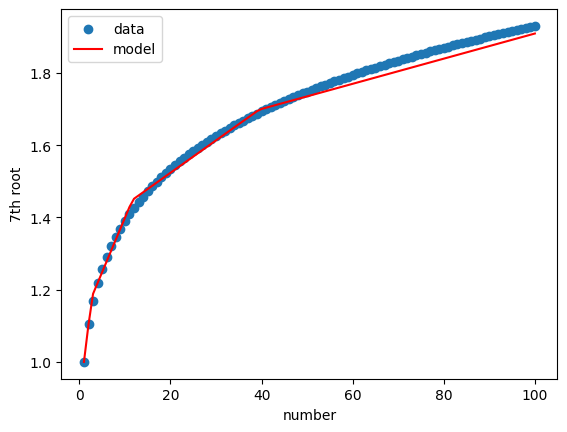

In [ ]:
import matplotlib.pyplot as plt
number_grid = np.linspace(1, 100, 100)
plt.scatter(X,y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('number')
plt.ylabel('7th root')
plt.legend()